<a href="https://colab.research.google.com/github/niltontac/EspAnalise-EngDados/blob/master/SeriesTemporais_Analise_Previsao_Vendas_Carros_USA_MLP_Arima_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicando na Série Temporal técnicas dos modelos MLP, ARIMA e KNN

Dataset: Vehicle (vendas de carros nos Estados Unidos de 1956 a 1976)
 
https://github.com/niltontac/EspAnalise-EngDados/blob/master/data/vehicle.txt

**Analyst:**

**Nilton Thiago de Andrade Coura**

Brazil - Recife/Pernambuco

  * **contact:** niltontac@gmail.com

  * https://github.com/niltontac

  * https://www.linkedin.com/in/niltontac/

In [1]:
#Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.pylab import rcParams
sns.set(rc={'figure.figsize':(15,6)})

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Carregando o dataset
data = pd.read_csv('https://raw.githubusercontent.com/niltontac/EspAnalise-EngDados/master/data/vehicle.txt')
data

,4.367
0,5.147
1,5.418
2,4.897
3,5.002
4,5.329
...,...
246,19.311
247,20.827
248,23.388
249,20.181


In [3]:
#Renomeando atributo
data.rename(columns={'4.367': 'Vendas'}, inplace=True)

#Atribuindo o período e a frêquencia de acordo com os dados da série, e setando o período como index da série
dataInicial = '19560101'
num_periodos = 251
frequencia = 'M'

data.index = pd.date_range(dataInicial, periods=num_periodos, freq=frequencia)
data

,Vendas
1956-01-31,5.147
1956-02-29,5.418
1956-03-31,4.897
1956-04-30,5.002
1956-05-31,5.329
...,...
1976-07-31,19.311
1976-08-31,20.827
1976-09-30,23.388
1976-10-31,20.181


In [4]:
#Consultando valores faltantes
data['Vendas'].isna().sum()

0

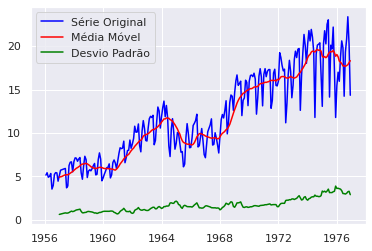

In [5]:
#Criando uma janela deslizante para analisar valores passados e visualizar a tendência e a sazonalidade da série original
m_m = data.rolling(window=12).mean()
m_std = data.rolling(window=12).std()

original = plt.plot(data, color='blue', label='Série Original')
mean = plt.plot(m_m, color='red', label='Média Móvel')
std = plt.plot(m_std, color='green', label='Desvio Padrão')
plt.legend(loc='best') 
plt.show()

Analisando o gráfico acima dos valores passados, a janela criada acima mostra que existe uma tendência e sazonalidade na série original, sendo evidenciada pelo crescimento da média móvel na linha vermelha

Nomalizando os dados da série (1 e -1):


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
#Técnica "MinMaxScaler" para ajustar os dados da série
min = 0
max = 1
scaler = MinMaxScaler(feature_range=(min, max)).fit(data)

In [8]:
#Normalizando os dados
serie_normalizada = scaler.transform(data.Vendas.values.reshape(1,-1))

In [9]:
#Série normalizada
serie_normalizada[0]

array([0.08110423, 0.09475593, 0.0685104 , 0.07379981, 0.09027253,
       0.        , 0.02030124, 0.08508387, 0.09531006, 0.09384918,
       0.04579114, 0.07732608, 0.10931439, 0.11198428, 0.11435192,
       0.11727369, 0.1194902 , 0.00725404, 0.01803436, 0.13651705,
       0.15576042, 0.1578258 , 0.09989421, 0.15984081, 0.18119994,
       0.17933605, 0.16140245, 0.1747519 , 0.18296307, 0.09480631,
       0.05692408, 0.13550955, 0.19026749, 0.17082263, 0.06694877,
       0.10447836, 0.11208503, 0.1058385 , 0.11858345, 0.1356103 ,
       0.14850637, 0.08221248, 0.08558763, 0.17047   , 0.20986348,
       0.17369402, 0.04800766, 0.06443   , 0.08649438, 0.10337011,
       0.12427586, 0.12593824, 0.14618911, 0.0646315 , 0.08276661,
       0.1537454 , 0.16870687, 0.15082364, 0.11843232, 0.16261146,
       0.20845297, 0.23968566, 0.23459775, 0.23772102, 0.27802126,
       0.1529394 , 0.18261045, 0.22371669, 0.22507682, 0.28451967,
       0.23671352, 0.26139741, 0.29353685, 0.36471714, 0.32965

In [10]:
#Atribuíndo os dados normalizados no atributo 'Vendas'
data['Vendas'] = serie_normalizada[0]
data

,Vendas
1956-01-31,0.081104
1956-02-29,0.094756
1956-03-31,0.068510
1956-04-30,0.073800
1956-05-31,0.090273
...,...
1976-07-31,0.794620
1976-08-31,0.870989
1976-09-30,1.000000
1976-10-31,0.838446


In [11]:
#Divindo o dataset em dados de Treino e Teste
train_data, test_data = data.loc['1956':'1974'], data.loc['1975':]

In [12]:
#Dados de treino definido entre 1956 a 1974
train_data

,Vendas
1956-01-31,0.081104
1956-02-29,0.094756
1956-03-31,0.068510
1956-04-30,0.073800
1956-05-31,0.090273
...,...
1974-08-31,0.835726
1974-09-30,0.840260
1974-10-31,0.848723
1974-11-30,0.660722


In [13]:
#Dados de teste definido de 1975 até o final da série (1976 nesta série)
test_data

,Vendas
1975-01-31,0.843182
1975-02-28,0.918795
1975-03-31,0.842426
1975-04-30,0.956425
1975-05-31,0.982117
1975-06-30,0.533777
1975-07-31,0.834870
1975-08-31,0.813309
1975-09-30,0.940003
1975-10-31,0.688882


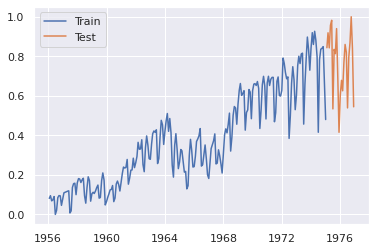

In [14]:
#Plotando a previsão dos dados de teste
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.legend(loc='best')
plt.show()

Observamos no gráfico acima que a previsão dos dados de teste (cor laranja) seguem uma tendência e sazonalidade coerente em relação aos dados de treino (cor azul)

In [15]:
# MAPE

#Definindo a função MAPE (Mean Absolute Percentage Error). 
#Calcula a acurária do erro em percentagem. Quando menor for o valor, melhor a acurácia.
def MAPE(actual: np.ndarray, predicted: np.ndarray):

    actual = list(actual)
    predicted = list(predicted)
    n = len(actual)
    soma = 0
    for i in range(0, len(actual)):
        if actual[i] > 0.0:
            x = np.abs((predicted[i] - actual[i]) / actual[i])

        else:
            x = 0
        
        soma = x + soma
    return 100/n * soma

In [16]:
import statsmodels.api as sm

In [17]:
#Definindo função de ACF(Auto-Correlação) e PACF(Auto-Correlação Parcial) 
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

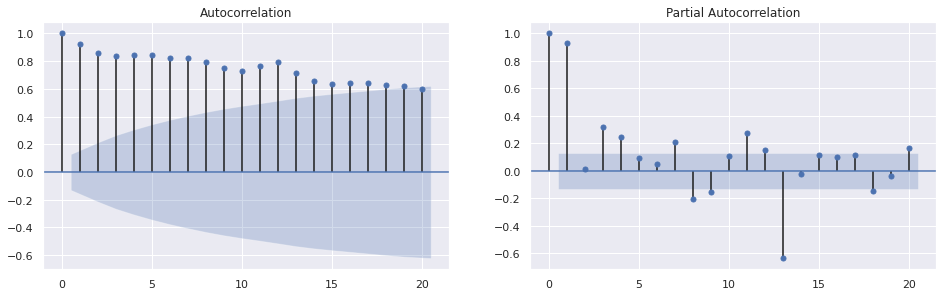

In [18]:
#Plotando a correlação linear dos pontos (lags) anteriores ao ponto de origem para visualizar e analisar os padrões da série
qtd_lag = 20 #Definindo a correlação de 20 pontos
acf_pacf(train_data, qtd_lag)

In [19]:
from statsmodels.tsa.stattools import adfuller

#Teste de Estacionariedade

#O teste de adf fornecem os seguintes resultados: estatística do teste, valor de p, lags, e o valor crítico em 
#intervalos de confiança 1%, 5% e 10%

def teste_df(serie):
  #H0: Série não estacionária
  dftest = adfuller(serie, autolag='AIC')
  df_output = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags', 'Nº Observações'])
  for key, value in dftest[4].items():
    df_output['Valor crítico (%s)'%key] = value
  print(df_output)
  if df_output[0] < df_output['Valor crítico (10%)']: #Descarta a H0 se o teste estatístico for menor que o valor crítico

    print('--------estacionária')
  else:
    print(df_output[0])
    print('--------não estacionária')

In [20]:
#Aplicando o teste adf aos dados
teste_df(train_data.Vendas)

Test Statistic          -1.404938
p-value                  0.579906
#Lags                   12.000000
Nº Observações         215.000000
Valor crítico (1%)      -3.461136
Valor crítico (5%)      -2.875079
Valor crítico (10%)     -2.573986
dtype: float64
-1.4049381915458368
--------não estacionária


O resultado do teste adf acima mostra que com base no nível de significância de 5% e no valor de p, a hipótese nula não pode ser rejeitada. Portanto a série é não-estacionária.

##Aplicando Experimentos

**MODELO ARIMA**

In [21]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error as MSE

In [22]:
#Parâmetros
p,d,q = 1, 1, 1 #Parâmetros do ARIMA

**Modelagem dos dados - ARIMA**

In [23]:
#Ajustando os dados de treino do modelo ARIMA
model = ARIMA(train_data.values, order=(p,d,q)).fit() 

In [24]:
#Treinando o modelo
model.predict(typ='levels')

array([0.08406546, 0.09495602, 0.07838457, 0.08155189, 0.09228878,
       0.0375527 , 0.04611707, 0.08314993, 0.09106543, 0.09231278,
       0.06588808, 0.08350993, 0.10298077, 0.10683293, 0.11036484,
       0.1140788 , 0.11729252, 0.05447107, 0.05708235, 0.12253249,
       0.13669514, 0.14153302, 0.11161448, 0.14634086, 0.16163974,
       0.16426337, 0.15718175, 0.16687654, 0.17401678, 0.12599788,
       0.10249441, 0.14424043, 0.17628556, 0.16822065, 0.11051501,
       0.12893118, 0.13224447, 0.1280758 , 0.13457401, 0.14419944,
       0.15225222, 0.11541712, 0.11536321, 0.1624153 , 0.18745182,
       0.17070375, 0.10053742, 0.10588686, 0.11566226, 0.12378397,
       0.1351579 , 0.1365226 , 0.14857805, 0.10313727, 0.11097697,
       0.15022465, 0.16076392, 0.15294542, 0.1357256 , 0.16078018,
       0.18884455, 0.2104438 , 0.21225259, 0.21802807, 0.24483579,
       0.17826355, 0.19413552, 0.21804837, 0.22101951, 0.25712231,
       0.2342379 , 0.25023967, 0.27145011, 0.31622201, 0.30291

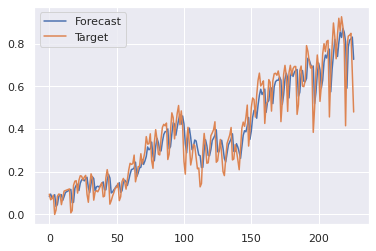

In [25]:
#Plotando o resultado do modelo de treinamento
#Comparando o resultado da previsão (Forecast) com o atributo original da série (Target)
plt.plot(model.predict(typ='levels'), label='Forecast')
plt.plot(train_data.values[1:], label='Target')
plt.legend()
plt.show()

O gráfico acima mostra o resultado dos dados de treino do modelo ARIMA para previsão da série. Observamos que a previsão segue uma semelhança entre a tendência e sazonalidade da série original.

**Avaliação dos dados - ARIMA**


In [26]:
#Subtraíndo os dados originais da série com a previsão, e o que teremos será o resíduo da série.
#Ou seja, teremos o ruído da série (resíduos dos dados matemáticos)
train_predict = model.predict(typ='levels')
residuo = train_data.Vendas.values[1:] - train_predict

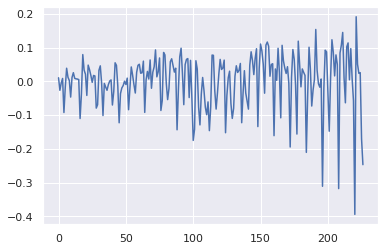

In [27]:
#Plotando o resíduo
plt.plot(residuo)

O gráfico acima mostra o resíduo desta série, que de maneira geral são os dados que não "puderam" ser explicados e computados matematicamente. 

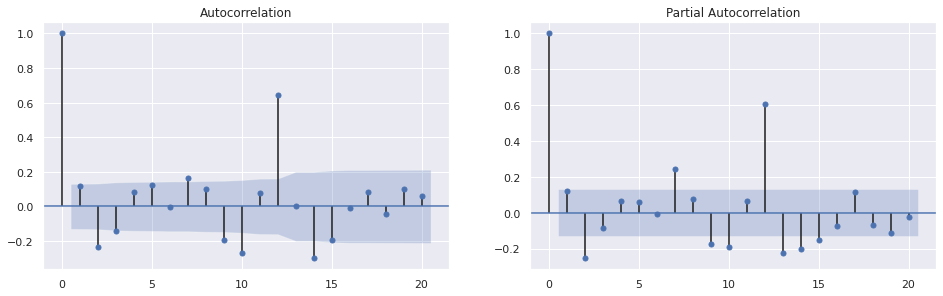

In [28]:
acf_pacf(residuo, 20)

In [29]:
#Calculando MAPE (Mean Absolute Percentual Error) dos dados de treino previstos
MAPE(train_data.Vendas.values[1:], train_predict)

28.99339984482753

O resultado MAPE evidencia a média percentual do erro absoluto dos dados. Para a distribuição dos dados de treinamento previstos do ARIMA, o percentual médio de erro absoluto não obteve um bom resultado. 

In [30]:
#Calculando MSE (Mean Squared Error) dos dados de treino previstos
MSE(train_data.Vendas.values[1:], train_predict)

0.006578332743742541

O resultado do MSE acima para os dados de treinamento usando o modelo ARIMA foi bem baixo. Mostra que os dados de treino previstos são interessantes porque envidencia que a média de erro entre distribuição desses dados de treinamento e a distribuição normal dos dados originais estão harmonizados.

**Teste dos dados - ARIMA**

In [31]:
#Preparando modelo de teste de previsão
predict_test = model.forecast(len(test_data))[0] 

In [32]:
#Dados de test com valores da série original
test_data.Vendas.values

array([0.8431817 , 0.91879502, 0.84242607, 0.95642537, 0.98211677,
       0.53377664, 0.83486978, 0.81330915, 0.94000302, 0.68888217,
       0.41544507, 0.60097728, 0.67830336, 0.6254093 , 0.76721576,
       0.85980555, 0.81970682, 0.53881417, 0.79461992, 0.87098887,
       1.        , 0.83844643, 0.54440582])

In [33]:
#Dados de test com valores previstos
predict_test

array([0.61759475, 0.68328891, 0.71547551, 0.73205195, 0.74135609,
       0.7472723 , 0.75161017, 0.75521274, 0.75847275, 0.76157318,
       0.76459926, 0.76759071, 0.77056602, 0.77353381, 0.77649811,
       0.77946077, 0.78242267, 0.78538422, 0.7883456 , 0.7913069 ,
       0.79426817, 0.79722942, 0.80019067])

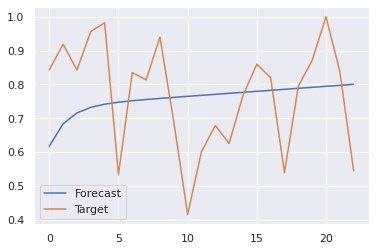

In [34]:
#Plotando modelo dos dados originais da teste e de previsão
#Comparando o resultado dos dados da previsão (Forecast) com os dados originais da série (Target)
plt.plot(predict_test, label='Forecast')
plt.plot(test_data.Vendas.values, label='Target')
plt.legend()
plt.show()

O gráfico acima mostra que o modelo ARIMA teve um desempenho muito ruim na previsão dos dados de testes. 

In [35]:
#Calculando MAPE (Mean Absolute Percentage Error) dos dados de teste previstos
MAPE(test_data.Vendas.values, predict_test)

21.51027104587909

A distribuição dos dados de testes previstos obteve um resultado melhor que os de treino, mas ainda sim o comportamento não é satisfatório como evidenciamos no gráfico de previsão dos dados de teste.

In [36]:
#Calculando MSE (Mean Squared Error) dos dados de teste previstos
MSE(test_data.Vendas.values, predict_test)

0.029982276366187194

Como podemos observar no modelo ARIMA, a média de erro da distribuição dos dados de testes previstos teve um resultado diferente (mais alto) que a distribuição dos dados de treino previstos, mas isso é esperado porque os dados previstos para testes é menor que os previstos para treino. De maneira geral, os resultados do MSE se comportam de que quanto mais dados, mais baixa será a média da taxa de erro.

**Criando uma janela deslizante para a série**

In [37]:
#Função de janela deslizante
def create_sliding_windows(series, window_size):

  list = []
  list_iterate = len(series) - window_size
  for i in range (0, list_iterate):
    window = series[i: i + window_size + 1]
    list.append(window)

  return np.array(list).reshape(len(list), window_size + 1)


In [38]:
#Preparando os dados de treinamento "olhando" para 20 pontos passados
windows_train = create_sliding_windows(train_data.values, 20)

In [39]:
windows_train.shape

(208, 21)

In [40]:
#Definindo o hiperparametro de validação em 25% dos dados
perc_val = 0.25
tam_val = np.fix(len(windows_train) * perc_val).astype(int)

In [41]:
tam_val

52

In [42]:
windows_train[0]

array([0.08110423, 0.09475593, 0.0685104 , 0.07379981, 0.09027253,
       0.        , 0.02030124, 0.08508387, 0.09531006, 0.09384918,
       0.04579114, 0.07732608, 0.10931439, 0.11198428, 0.11435192,
       0.11727369, 0.1194902 , 0.00725404, 0.01803436, 0.13651705,
       0.15576042])

In [43]:
#Dados de treinamento
X_train, y_train = windows_train[0:-tam_val, 0:-1], windows_train[0:-tam_val, -1]

#Dados de validação
X_val, y_val = windows_train[-tam_val:, 0:-1], windows_train[-tam_val:, -1]

In [44]:
X_train.shape

(156, 20)

In [45]:
X_train[0]

array([0.08110423, 0.09475593, 0.0685104 , 0.07379981, 0.09027253,
       0.        , 0.02030124, 0.08508387, 0.09531006, 0.09384918,
       0.04579114, 0.07732608, 0.10931439, 0.11198428, 0.11435192,
       0.11727369, 0.1194902 , 0.00725404, 0.01803436, 0.13651705])

In [46]:
y_train[0]

0.15576041509243865

In [47]:
X_val.shape

(52, 20)

In [48]:
#Dados de entrada de treinamento (20 pontos passados)
train_data['Vendas'].values[-20:]

array([0.81587829, 0.45680318, 0.6588585 , 0.78681175, 0.8972344 ,
       0.83179689, 0.72958541, 0.84252682, 0.9194499 , 0.8597048 ,
       0.92645207, 0.88096318, 0.79638305, 0.41554582, 0.78308398,
       0.83572616, 0.84025994, 0.84872299, 0.66072238, 0.47997582])

In [49]:
#Preparando o conjunto de dados de teste com os dados de treino com os 20 pontos passados atribuídos
pontos_anteriores_test = train_data['Vendas'].values[-20:]
test = np.hstack([pontos_anteriores_test, test_data['Vendas'].values])

In [50]:
#Quantidade de dados de teste para previsão
len(test_data)

23

In [51]:
#Preparando a janela de teste
windows_test = create_sliding_windows(test, 20)

In [52]:
windows_test.shape

(23, 21)

In [53]:
X_test, y_test = windows_test[:, 0:-1], windows_test[:,-1]

**Seleção de Lags**

In [54]:
#Função para selecionar os lags
def select_lag_acf(serie, max_lag):
  from statsmodels.tsa.stattools import acf
  x = serie[0: max_lag + 1]

  acf_x, confint = acf(serie, nlags=max_lag, alpha=.05, fft=False, unbiased=False)

  limiar_superior = confint[:, 1] - acf_x
  limiar_inferior = confint[:, 0] - acf_x

  lags_selecionados = []

  for i in range(1, max_lag + 1):

    if acf_x[i] >= limiar_superior[i] or acf_x[i] <= limiar_inferior[i]:
      lags_selecionados.append(i-1) #-1 por conta de que o lag 1 em python é o 0
  
  #Caso nenhum lag seja selecionado, essa atividade de seleção para o gridsearch encontar a melhor combinação de lags
  if len(lags_selecionados)==0:

    print('Nenhum lag por acf')
    lags_selecionados = [i for i in range(max_lag)]

  print('Lags', lags_selecionados)

  #Inverte o valor dos lags para usar na lista de dados
  lags_selecionados = [max_lag - (i+1) for i in lags_selecionados]

  return lags_selecionados

In [55]:
#Retorno da seleção dos lags
lags_sel = select_lag_acf(train_data, 20)

Lags [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [56]:
#Lags que serão passados a matriz
lags_sel

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [57]:
X_train.shape

(156, 20)

In [58]:
#Atribuíndo os valores dos lags para treino, teste e validação
X_train = X_train[:, lags_sel]
X_val = X_val[:, lags_sel]
X_test = X_test[:, lags_sel]

In [59]:
X_train.shape

(156, 19)

**Modelagem e Treinamento**

In [60]:
import itertools

**MODELO - KNN:**

In [61]:
#KNN

from sklearn.neighbors import KNeighborsRegressor

def treinar_knn(X_train, y_train, X_val, y_val):

  #Número de k (vizinhos)
  k = [2, 4, 8, 10]
  metric = ['euclidean', 'minkowski']

  hyper_param = list(itertools.product(k, metric))

  best_result = np.Inf
  for i, j in hyper_param:

    knn = KNeighborsRegressor(n_neighbors=i, metric=j)
    knn.fit(X_train, y_train)
    predict_validation = knn.predict(X_val)
    mse = MSE(y_val, predict_validation)

    if mse < best_result:
      best_result = mse
      select_model = knn
      print('Valor do k = ', i)

  return select_model

In [62]:
modelo = treinar_knn(X_train, y_train, X_val, y_val)

Valor do k =  2


In [63]:
trainPredict = modelo.predict(X_train)

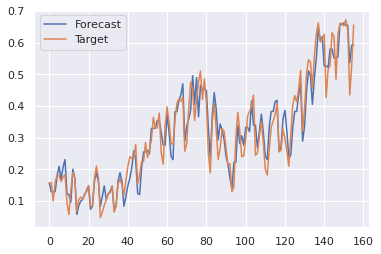

In [64]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='Target')
plt.legend()
plt.show()

O gráfico acima mostra o resultado dos dados de treino do modelo KNN para previsão da série. Observamos que a previsão segue uma semelhança entre a tendência e sazonalidade da série original.

In [65]:
#Calculando MAPE (Mean Absolute Percentage Error) dos dados de treino previstos
MAPE(y_train, trainPredict)

14.277271928987016

No modelo KNN, o resultado MAPE para a distribuição dos dados de treinamento teve um comportamento melhor que o ARIMA.

In [66]:
#Calculando MSE (Mean Squared Error) dos dados de treino previstos
MSE(y_train, trainPredict)

0.0019887575756092368

Para o modelo KNN, pela média de erro, a distribuição para os dados previstos de treinamento também estão harmonizados em relação a distribuição dos dados originais. 

**Teste - KNN**

In [67]:
testPredict = modelo.predict(X_test)

In [68]:
testPredict

array([0.48118483, 0.59170823, 0.66233439, 0.65513072, 0.53637096,
       0.53637096, 0.48118483, 0.59170823, 0.54531258, 0.55354894,
       0.59994459, 0.59170823, 0.59170823, 0.59170823, 0.65409803,
       0.66233439, 0.65513072, 0.53637096, 0.48118483, 0.64689436,
       0.53637096, 0.53637096, 0.55354894])

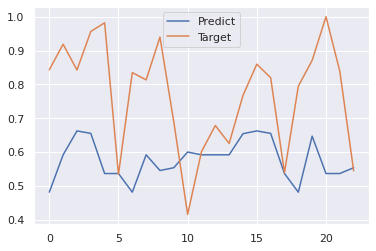

In [69]:
plt.plot(testPredict, label='Predict')
plt.plot(y_test, label='Target')
plt.legend()
plt.show()

Os dados de teste para o modelo KNN não foi capaz de prever com competência a sazonalidade da série original.

In [70]:
#Calculando MAPE (Mean Absolute Percentage Error) dos dados de teste previstos
MAPE(y_test, testPredict)

25.2226711546012

O erro percentual médio absoluto da distribuição dos dados de teste previstos para modelo KNN obteve um resultado ruim. Pior, inclusive, que a distribuição dos dados de treinamento. 
Tanto é que podemos observar no gráfico acima que a previsão obtida pelos dados de teste teve um comportamento completamente diferente do esperado.

In [71]:
#Calculando MSE (Mean Squared Error) dos dados de teste previstos
MSE(y_test, testPredict)

0.06454860282323803

Seguindo o padrão esperado de comportamento do MSE, para o KNN, o resultado da média de erro para a distribuição dos dados de teste é maior que a distribuição dos dados de treino porque os dados previstos para teste é menor que os previstos para treino, mas não quer dizer que a diferença seja relevante.

**MODELO - MLP (Multilayer Perceptron):**

In [72]:
from sklearn.neural_network import MLPRegressor

In [73]:
#MLP

def treinar_mlp(X_train, y_train, X_val, y_val, num_exec):
  
  
  neuronios = [5, 10, 20] 
  func_activation = ['tanh', 'relu', 'logistic'] 
  alg_treinamento = ['lbfgs'] 
  max_iteracoes = [10000]
  learning_rate = ['adaptive'] 

  best_result = np.Inf
  for i in range(0, len(neuronios)):
    for j in range(0, len(func_activation)):
      for l in range(0, len(alg_treinamento)):
        for m in range(0, len(max_iteracoes)):
          for n in range(0, len(learning_rate)):

            for e in range(0, num_exec):
              mlp = MLPRegressor(hidden_layer_sizes= neuronios[i], activation= func_activation[j], solver= alg_treinamento[l], max_iter= max_iteracoes[m], learning_rate= learning_rate[n])
              mlp.fit(X_train, y_train)
              predict_validation = mlp.predict(X_val)
              mse = MSE(y_val, predict_validation)

              if mse < best_result:
                best_result = mse
                select_model = mlp 
                print('func: ', func_activation[j])

  return select_model

In [74]:
modelo = treinar_mlp(X_train, y_train, X_val, y_val, 30) #30 execuções para cada iteração

func:  tanh
func:  tanh
func:  tanh
func:  tanh
func:  logistic
func:  tanh
func:  tanh
func:  relu
func:  relu


In [75]:
trainPredict = modelo.predict(X_train)

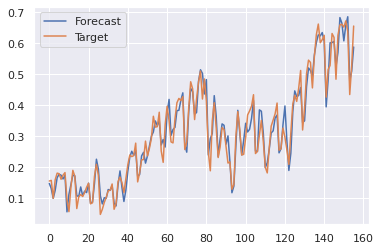

In [76]:
plt.plot(trainPredict, label='Forecast')
plt.plot(y_train, label='Target')
plt.legend()
plt.show()

O gráfico acima mostra o resultado dos dados de treino do modelo MLP para previsão da série. Observamos que a previsão segue uma semelhança entre a tendência e sazonalidade da série original.

In [77]:
def MAPE(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [78]:
#Calculando MSE (Mean Squared Error) dos dados de treino previstos
MSE(y_train, trainPredict)

0.0011236182178317982

In [79]:
#Calculando MAPE (Mean Absolute Percentage Error) dos dados de treino previstos
MAPE(y_train, trainPredict)

10.48916558797146

In [80]:
#Padronizando a distribuição dos dados de treino previstos
predictRealInterval = scaler.inverse_transform(trainPredict.reshape(1,-1))

In [81]:
#Padronizando a distribuição dos dados de treino
targetRealInterval = scaler.inverse_transform(y_train.reshape(1,-1))

In [82]:
#Calculando MSE para os dados de treino padronizados
MSE(targetRealInterval, predictRealInterval)

0.4427754680024961

In [83]:
#Calculando MAPE para os dados treino padronizados
MAPE(targetRealInterval, predictRealInterval)

5.394326815770238

Para o modelo MLP, pela média de erro, a distribuição para os dados previstos de treinamento estão harmonizados em relação a distribuição dos dados originais.

Já os resultados para o MAPE, o resultado para a distribuição dos dados de treino previstos foi bem satisfatório após padronizá-los usando a função scaler.

**Teste - MLP**

In [84]:
#Calculando previsão dos dados de teste
testPredict = modelo.predict(X_test)

In [85]:
testPredict

array([0.46246253, 0.82605801, 0.8930282 , 0.81805946, 0.77409902,
       0.67460991, 0.7539523 , 0.97233513, 0.88244058, 0.91560747,
       0.52064934, 0.50279764, 0.81307994, 0.73840128, 0.58518862,
       0.81312947, 0.75890787, 0.47934591, 0.67177788, 0.87557853,
       0.9782578 , 0.82651125, 0.66640834])

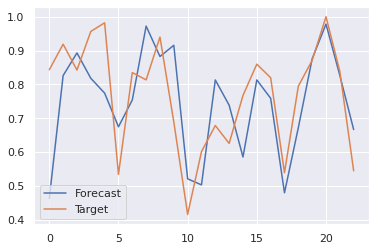

In [86]:
plt.plot(testPredict, label='Forecast')
plt.plot(y_test, label='Target')
plt.legend()
plt.show()

A previsão dos dados de teste do modelo MLP teve um comportamento interessante, embora com diferenças de picos sazonais em alguns lags.

In [87]:
#Calculando MAPE (Mean Absolute Percentage Error) dos dados de teste previstos
MAPE(y_test, testPredict)

15.685409589598006

A média percentual de erro absoluto para a distribuição dos dados de treinos de teste obteve um resultado próximo a distribuição dos dados de treino, apesar de ter sido um pouco acima.

In [88]:
#Calculando MSE (Mean Squared Error) dos dados de teste previstos
MSE(y_test, testPredict)

0.019552550705196958

In [89]:
#Padronizando a distribuição dos dados de teste previstos
predictRealInterval = scaler.inverse_transform(testPredict.reshape(1,-1))

In [90]:
#Padronizando a distribuição dos dados de teste
targetRealInterval = scaler.inverse_transform(y_test.reshape(1,-1))

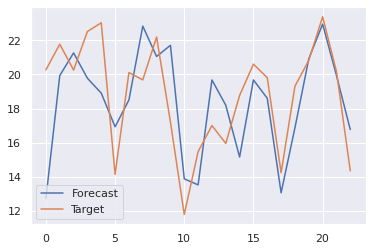

In [91]:
plt.plot(predictRealInterval[0], label= 'Forecast')
plt.plot(targetRealInterval[0], label= 'Target')
plt.legend()
plt.show()

Após a previsão dos dados de testes do modelo MLP, podemos observar que em comparação a previsão dos dados de treino, o resultado da previsão dos dados de treino quase não mudou. 

In [92]:
#Calculando MSE para os dados de teste padronizados
MSE(targetRealInterval[0], predictRealInterval[0])

7.704921166054015

In [93]:
#Calculando MAPE para os dados de teste padronizados
MAPE(targetRealInterval[0], predictRealInterval[0])

12.484445719376389

Para o MLP, o resultado da média de erro para a distribuição dos dados de teste padronizados teve um o comportamento pior para MSE.

Em contrapartida, o percentual médio do erro absoluto dos dados padronizados teve um resultado melhor.

###Conclusão

O intuito da análise para esta série temporal, foi aplicar modelos onde usando técnicas de Machine Learning onde fosse capaz de realizar previsões baseadas em dados de treinamento e teste, onde aplicando algumas métricas se conseguisse através de uma abordagem comparativa mensurar o comportamento de cada modelo para prever dados futuros da série baseada em seus dados passados.

Foram usados os modelos ARIMA, KNN e MLP nesta análise.

Pudemos observar o comportamento de cada modelo, tanto para a distribuição dos dados de treino quanto para a distribuição dos dados de teste.
O ARIMA e o KNN não foram capazes, atráves dos parametros utilizados, de prever bons dados futuros para a série. Os gráficos mostraram que os resultados não foram nada satisfatórios.

No modelo MLP, o comportamento foi bem melhor em relação aos outros dois modelos usados. Esse modelo conseguiu de maneira geral prever melhor os dados, mesmo com alguns picos em diferentes em alguns lags.

Em comparação aos modelos usados para esta análise, sem dúvida o modelo MLP foi que teve os melhores resultados. Na verdade, foi o único com resultados satisfatórios para esta série. 
